In [1]:
import os
import cv2
import sys
import random
import numpy as np


In [2]:
class Eigenfaces(object):                                                       # *** COMMENTS ***
    faces_count = 2

    faces_dir = '.'                                                             # directory path to the AT&T faces

    l = (400)                                      # training images count
    m = 92                                                                      # number of columns of the image
    n = 112                                                                     # number of rows of the image
    mn = m * n                                                                  # length of the column vector
    
    def __init__(self, _energy = 0.85):
        print('> Initializing started')

        self.energy = _energy
        self.training_ids = []                                                  # train image id's for every at&t face

        L = np.empty(shape=(self.mn, self.l), dtype='float64')                  # each row of L represents one train image


        test_images = []
        labels = []

        i = 0
        a = 0            
        for imgfolder in os.listdir('./Bioid/'):
            for filename in os.listdir('./Bioid/' + imgfolder):
                filename = './Bioid/' + imgfolder + '/'+ filename
                if (filename.lower().endswith(('.png', '.jpg', '.jpeg','.pgm'))):
                    img=cv2.imread(filename,0)

                    img = cv2.resize(img, (92,112), interpolation = cv2.INTER_AREA)

                    img_col = np.array(img, dtype='float64').flatten()              # flatten the 2d image into 1d

                    L[:, i] = img_col[:]                                      # set the cur_img-th column to the current training image
                    
                    i += 1
                    #L[:, i] = img_col[:]
                    #i+=1

                                           

        self.mean_img_col = np.sum(L, axis=1) / self.l                          # get the mean of all images / over the rows of L

        for j in range(0, self.l):                                             # subtract from all training images
            L[:, j] -= self.mean_img_col[:]

        C = np.matrix(L.transpose()) * np.matrix(L)                             # instead of computing the covariance matrix as
        C /= self.l                                                             # L*L^T, we set C = L^T*L, and end up with way
                                                                                # smaller and computentionally inexpensive one
                                                                                # we also need to divide by the number of training
                                                                                # images

        self.evalues, self.evectors = np.linalg.eig(C)                          # eigenvectors/values of the covariance matrix
        sort_indices = self.evalues.argsort()[::-1]                             # getting their correct order - decreasing
        self.evalues = self.evalues[sort_indices]                               # puttin the evalues in that order
        self.evectors = self.evectors[sort_indices]                             # same for the evectors

        evalues_sum = sum(self.evalues[:])                                      # include only the first k evectors/values so
        evalues_count = 0                                                       # that they include approx. 85% of the energy
        evalues_energy = 0.0
        for evalue in self.evalues:
            evalues_count += 1
            evalues_energy += evalue / evalues_sum

            if evalues_energy >= self.energy:
                break

        self.evalues = self.evalues[0:evalues_count]                            # reduce the number of eigenvectors/values to consider
        self.evectors = self.evectors[0:evalues_count]

        self.evectors = self.evectors.transpose()                               # change eigenvectors from rows to columns
        self.evectors = L * self.evectors                                       # left multiply to get the correct evectors
        norms = np.linalg.norm(self.evectors, axis=0)                           # find the norm of each eigenvector
        self.evectors = self.evectors / norms                                   # normalize all eigenvectors

        self.W = self.evectors.transpose() * L                                  # computing the weights

        print('> Initializing ended')

        
    def classify(self, img):
        #img = cv2.imread(path_to_img, 0)

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.equalizeHist(gray)

        
        img = cv2.resize(img,(92, 112), interpolation = cv2.INTER_AREA)                                       # read as a grayscale image
        img_col = np.array(img, dtype='float64').flatten()                      # flatten the image
        img_col1=img_col
        img_col -= self.mean_img_col                                            # subract the mean column
        img_col2 = img_col
        img_col = np.reshape(img_col, (self.mn, 1))                             # from row vector to col vector
        img_col3 =img_col
        
        S = self.evectors.transpose() * img_col                                 # projecting the normalized probe onto the
                                                                                # Eigenspace, to find out the weights
        diff = self.W - S                                                       # finding the min ||W_j - S||

        norms = np.linalg.norm(diff, axis=0)

        closest_face_id = np.argmin(norms) +1                                     # the id [0..240) of the minerror face to the sample
        return closest_face_id,norms

In [3]:
def draw_rects(img, x1, y1, x2, y2, color):
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

In [4]:
if __name__ == "__main__":
    efaces = Eigenfaces()                                       # create the Eigenfaces object with the data dir

> Initializing started
> Initializing ended


In [5]:
    import matplotlib.pyplot as plt
        
    
    imgliv = cv2.imread('./ben2.jpg')
    liv,norms = efaces.classify(imgliv)
    print(liv<391)
    print(liv)
    print(norms[liv])
    plt.plot(norms)
    plt.xlim(liv-100,liv+100)
    plt.show()
    #cv2.imshow('facedetect', imgliv)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()


True
332
6261.148223542371


0.19801616668701172
0.28002238273620605
0.19101524353027344
0.22102046012878418
0.22001433372497559
0.20201349258422852
0.2370147705078125
0.20301413536071777
0.21901321411132812
0.19501328468322754
0.22901558876037598
0.1900167465209961
0.2180173397064209
0.19501304626464844
0.21901440620422363
0.20501375198364258
0.23101425170898438
0.1940135955810547
0.21201372146606445
0.19001054763793945
0.21601510047912598
0.18601369857788086
0.21501708030700684
0.18501639366149902
0.22801494598388672
0.1850109100341797
0.21701741218566895
0.18501806259155273
0.21556448936462402
0.18765807151794434
0.21501588821411133
0.18401861190795898
0.21601510047912598
0.1880190372467041
0.21401715278625488
0.1840198040008545
0.21501994132995605
0.18601679801940918
0.2180159091949463
0.1850125789642334
0.2070167064666748
0.18301177024841309
0.2160191535949707
0.18701601028442383
0.2140195369720459
0.185014009475708
0.21601605415344238
0.1850123405456543
0.22001886367797852
0.18401265144348145
0.2160193920135

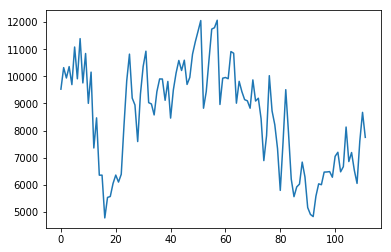

In [51]:
    cam = cv2.VideoCapture('./video.mpg')
    while True:
        
        ret, img = cam.read()
        import time
        start = time.time()

        #img = cv2.imread('./charlie.jpg')


        height, width, channels = img.shape

        div = int(width/100)

        vis = cv2.resize(img,(int(width/div), int(height/div)), interpolation = cv2.INTER_AREA)

        height, width, channels = vis.shape

        x = 92
        y = 112

        nom=[]
        xy = []
        for i in range(4):
            w = 0
            for a in range(width):
                h = 0
                if((w + x)>width):
                    break
                for b in range(height):
                    if((h + y)>height):
                        break
                    temp = vis[h : h + y, w : w + x]
                    liv,norms = efaces.classify(temp)
                    nom.append(norms[liv-1])
                    xy.append([h+20*i,y+20*i,w+20*i,x+20*i])
                    h += 5

                w += 5
            x -= 20
            y -= 20

        done = time.time()
        elapsed = done - start
        print(elapsed)

        h,y,w,x=xy[np.argmin(nom)]
        draw_rects(img, w,h,w + x,h + y, (255,255,255))


        cv2.imshow('facedetect', img)
        #cv2.waitKey(0)
        if 0xFF & cv2.waitKey(5) == 27:
            break
    cv2.destroyAllWindows()

    plt.plot(nom)
    plt.show()


In [12]:
    vis = cv2.resize(img,(int(width/4), int(height/4)), interpolation = cv2.INTER_AREA)
    cv2.imshow('facedetect', vis)
    cv2.waitKey(0)
    #    if 0xFF & cv2.waitKey(5) == 27:
    #        break
    cv2.destroyAllWindows()